<H1>MADATORY PYTHON LIBRARIES</H1>

In [33]:
%matplotlib  inline
import xarray
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
import numpy as np
import datetime
plt.rcParams.update({'font.size': 15})

<h1>IN SITU VESSELS</h1>

In Situ 'vessels' comprehends a wide range of devices on board of vessels like Thermosalinometers, CTDs, MiniLoggers, Ferriboxes, XBTs, Bottles, BATHY and TESAC. Depending on the device, vessels provides data time series of certain parameters along its trajectory either for the upper watter surface (time series) or along the water column (profiles). It's platform data types are TS, CT, ML, FB, XB, BO, BA and TE:

In [4]:
data = { 'PR (profile)': [' -', ' ✔',' ✔ ', ' ✔',' ✔', '  ✔',' ✔', ' ✔'], 'TS (time serie)': [' ✔', ' -',' - ', ' - ',' - ', ' -', '- ', ' -']}
pd.DataFrame(data=data, index=['TS (thermosalinomter)', 'CT (CTDs)', 'ML (Miniloggers)', 'FB (Ferribox)', 'XB (XBTs)', 'BO (Bottles)', 'BA (BATHY)', 'TE (TESAC)'])

,PR (profile),TS (time serie)
TS (thermosalinomter),-,✔
CT (CTDs),✔,-
ML (Miniloggers),✔,-
FB (Ferribox),✔,-
XB (XBTs),✔,-
BO (Bottles),✔,-
BA (BATHY),✔,-
TE (TESAC),✔,-


<h1>PLOTTING LAGRANGIAN TIME SERIES</h1>

<h3> 1. DATASET LOOKUP</h3>

Imagine you have downloaded some <i>_TS_ (time serie)</i> dataset from In Situ vessels (see how to download files froma  certain [platform type](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebook/In_Situ_data_download_by_platform_type.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_type.ipynb)) like: [GL_TS_TS_FNAV_2002.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/vessel/GL_TS_TS_FNAV_2002.nc)

In [5]:
dataset = 'GL_TS_TS_FNAV_2002.nc'

Let's have a look to its content:

In [6]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/GL_TS_TS_FNAV_2002.nc


In [7]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [8]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'POSITIONING_SYSTEM',
 u'DC_REFERENCE',
 u'DEPH',
 u'DEPH_QC',
 u'DEPH_DM',
 u'PSAL',
 u'PSAL_QC',
 u'PSAL_DM',
 u'PSAL_ADJUSTED_ERROR',
 u'PSAL_ADJUSTED_ERROR_DM',
 u'PSAL_ADJUSTED',
 u'PSAL_ADJUSTED_QC',
 u'PSAL_ADJUSTED_DM',
 u'SSJT',
 u'SSJT_QC',
 u'SSJT_DM']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [9]:
ds['PSAL']

<xarray.DataArray 'PSAL' (TIME: 32764, DEPTH: 1)>
array([[ 32.612999],
       [ 32.647999],
       [ 32.689999],
       ..., 
       [ 31.716   ],
       [ 31.566   ],
       [ 31.031   ]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2002-04-13T04:59:59.971200 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      Practical salinity
    standard_name:  sea_water_practical_salinity
    units:          0.001

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [10]:
ds['PSAL_QC']

<xarray.DataArray 'PSAL_QC' (TIME: 32764, DEPTH: 1)>
array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 2.],
       [ 2.],
       [ 2.]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2002-04-13T04:59:59.971200 ...
Dimensions without coordinates: DEPTH
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [11]:
pd.DataFrame(data=ds['PSAL_QC'].attrs['flag_values'], index = ds['PSAL_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


In [23]:
lonmin = ds['LONGITUDE'].min().values.tolist()
lonmax = ds['LONGITUDE'].max().values.tolist()
latmin = ds['LATITUDE'].min().values.tolist()
latmax = ds['LATITUDE'].max().values.tolist()
print([lonmax, lonmin, latmax, latmin])

[11.779999732971191, -80.12000274658203, 53.97999954223633, 5.21999979019165]


In [24]:
m = Basemap(projection='merc', llcrnrlat=latmin-5, urcrnrlat=latmax+5,llcrnrlon=lonmin-5, urcrnrlon=lonmax+10, resolution='i')

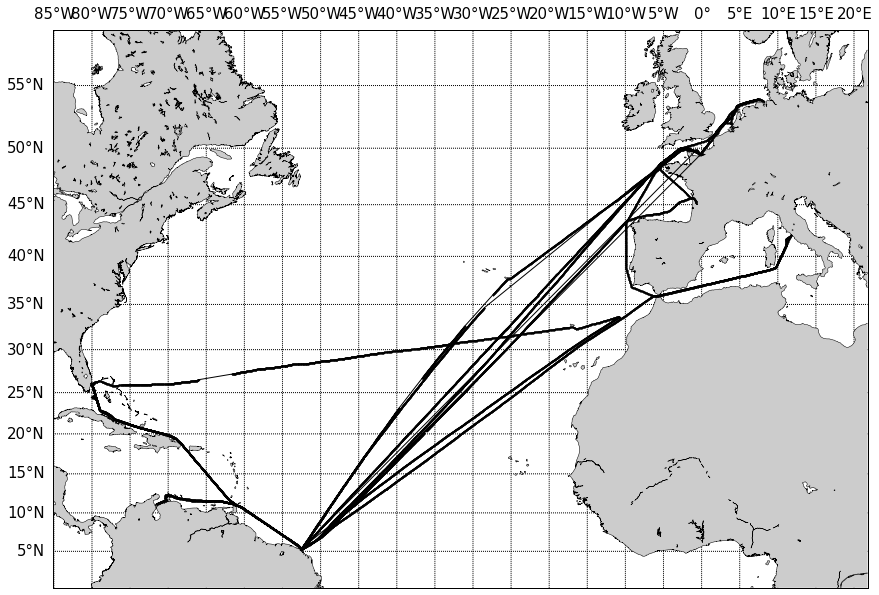

In [25]:
fig = plt.figure(figsize=(15,10))
x, y = m(ds['LONGITUDE'].values.tolist(), ds['LATITUDE'].values.tolist())
m.plot(x,y,marker='o',color='k', ms=1)

m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)

plt.show()

The above lookup reveals several trips made by the same boat. These are called 'deployments'. Let's select the trip (deployment) that ocurred on april 2002:

In [38]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=ds['PSAL'].min(), vmax=ds['PSAL'].max())

<ul><li>cmap=cmap sets the colormap (see more <a href="https://matplotlib.org/examples/color/colormaps_reference.html" targte="_blank">here</a>)</li>
<li>norm=norm sets the limits for the color scale; in this case: the max min values of the variable whose lagrangian time serie we want to plot </li></ul>

In [39]:
m = Basemap(projection='merc', llcrnrlat=latmin-1, urcrnrlat=latmax+1,llcrnrlon=lonmin-1, urcrnrlon=lonmax+1, resolution='i')

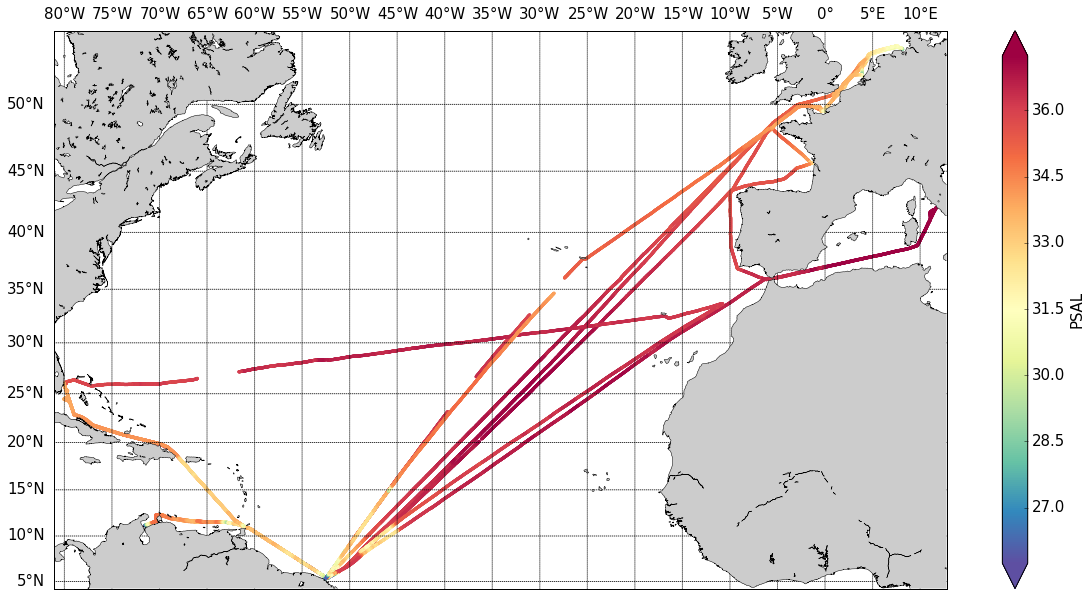

In [83]:
fig = plt.figure(figsize=(20,10))
x, y = m(ds['LONGITUDE'].values.tolist(), ds['LATITUDE'].values.tolist())
ax = plt.subplot(111)
im = m.scatter(x, y, s=10, c=ds['PSAL'], edgecolor='None', cmap=cmap, norm=norm)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)
cbar = plt.colorbar(extend='both', cmap=cmap, norm=norm)
ax.set_aspect('auto')
cbar.ax.set_ylabel('PSAL')
plt.show()

Let's choose just a certain time range:

In [90]:
subset = ds.sel(TIME=slice('2002-04-01', '2002-05-01'), DEPTH=0)

In [91]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=subset['PSAL'].min(), vmax=subset['PSAL'].max())

In [92]:
ini = ds['TIME'].values.tolist().index(subset['TIME'].values.tolist()[0])
end = ds['TIME'].values.tolist().index(subset['TIME'].values.tolist()[len(subset['TIME'])-1])

In [93]:
lats = ds['LATITUDE'].values.tolist()[ini:end]
lons = ds['LONGITUDE'].values.tolist()[ini:end]

In [95]:
m = Basemap(projection='merc', llcrnrlat=latmin-1, urcrnrlat=latmax+1,llcrnrlon=lonmin-1, urcrnrlon=lonmax+1, resolution='i')

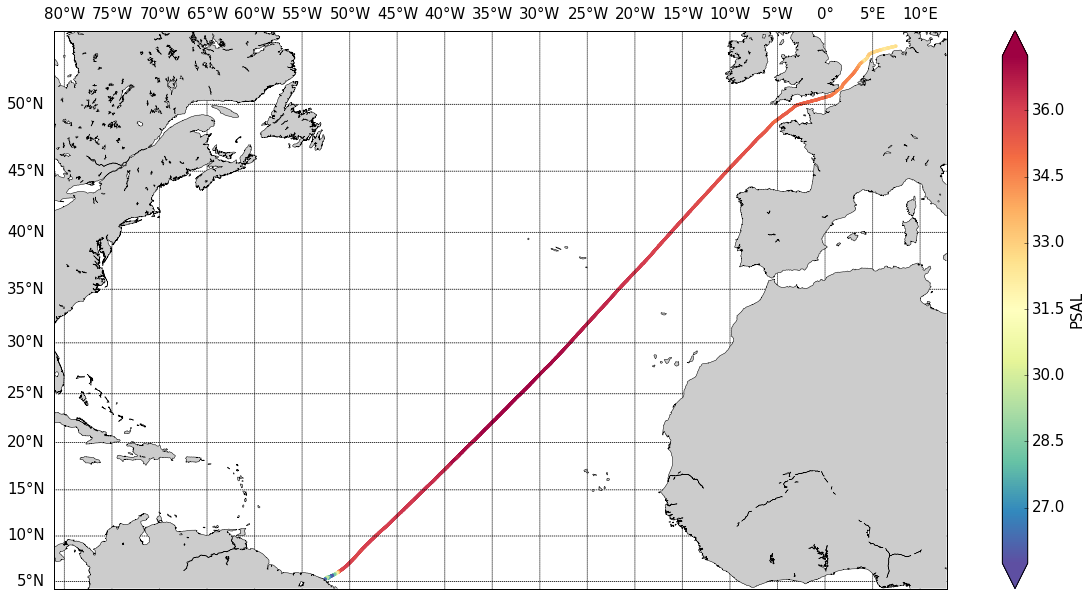

In [98]:
fig = plt.figure(figsize=(20,10))
x, y = m(lons,lats)
ax = plt.subplot(111)
im = m.scatter(x, y, s=10, c=ds['PSAL'][ini:end,0], edgecolor='None', cmap=cmap, norm=norm)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)
cbar = plt.colorbar(extend='both', cmap=cmap, norm=norm)
ax.set_aspect('auto')
cbar.ax.set_ylabel('PSAL')
plt.show()